## Let's start to work with my favorite library for plots: Seaborn!

#### Seaborn is a library that works very well to plot dataset analysis as well matplotlib, but with more style!

In [2]:
import seaborn as sns

**First, let's import a dataset that we can get inside the library**

In [3]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**It's always a good idea look a description of our data and see if We got some missing information**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


**Well, or dataset has 7 features and 244 rows with no null values.**

## Distplot - distribution of data

Let's have a look on our data distribution of total_bill feature with distplot:

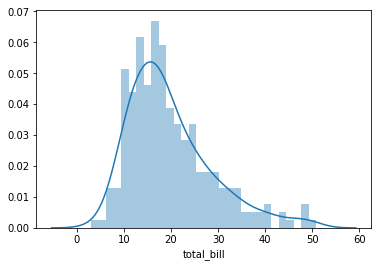

In [9]:
sns.distplot(df.total_bill, kde = True, bins = 30)

# sns.distplot(data, kde = line for the curve, bins = scale for the bars)

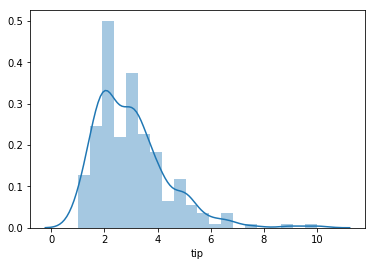

In [15]:
sns.distplot(df.tip, kde = True, bins = 20)

## Jointplot - Correlation for two variables with a scatter plot

Let's analise the two features (total_bill and tip) to see with there's a correlation betweem them

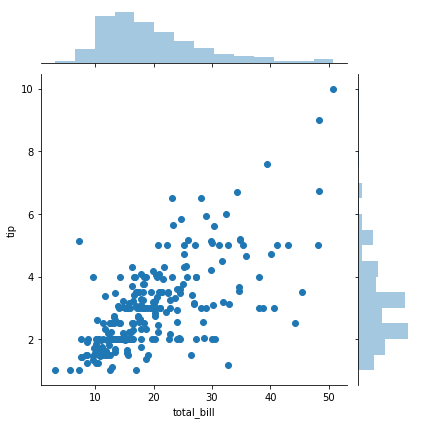

In [17]:
sns.jointplot(x = 'total_bill',y = 'tip',data = df)

# sns.jointplot(x = column to X axis, y = column to Y axis, data = dataframe)

**Well, is possible to change the plot style? Of course!**

Let's choose one of style options to set our plots 

In [25]:
sns.set_style('darkgrid')

# Options to set: darkgrid, whitegrid, dark, white, ticks

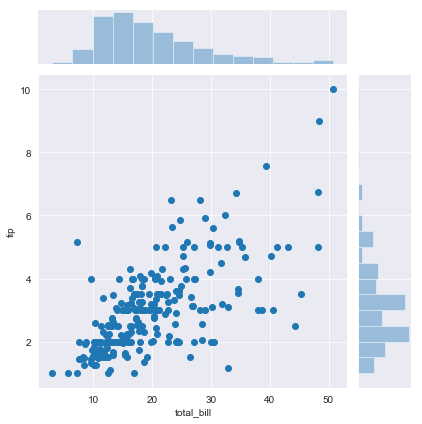

In [26]:
sns.jointplot(x = 'total_bill',y = 'tip',data = df)

Now, lets plot more informations and play with styles

## Pairplot - multiple graphics with one comand!

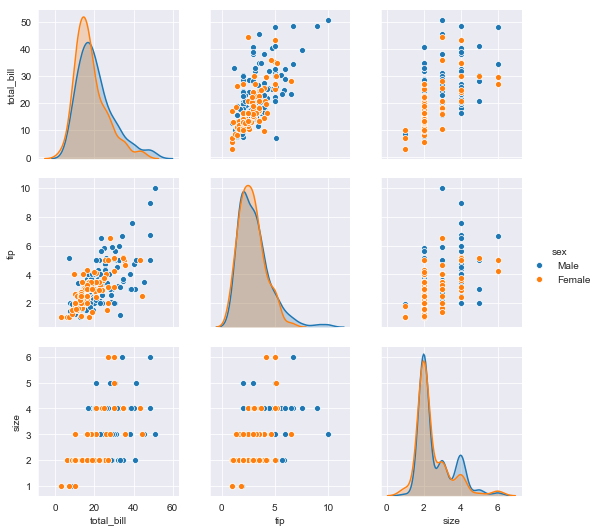

In [28]:
sns.pairplot(data = df, hue = 'sex')

# sns.pairplot(data = dataframe, hue = separete de plots by...)

# The hue parameter is used to segregate the data by one feature, is this case, separating the data by the sex

##### We can also change the style of our pairplot

Let's see an example:

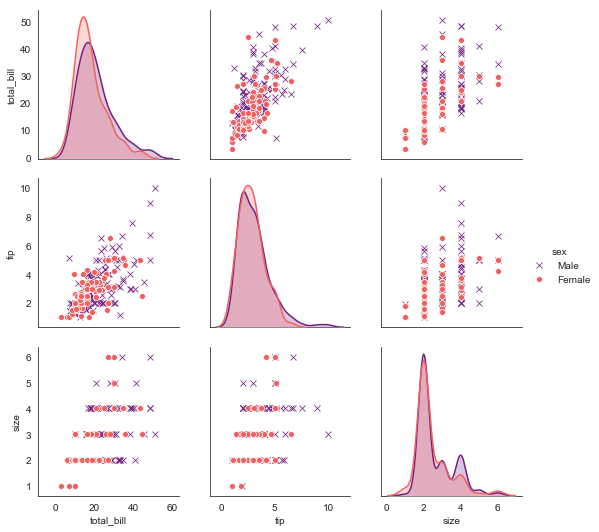

In [32]:
sns.set_style('white')
sns.pairplot(df, hue = 'sex',palette = 'magma', markers = ['x','o'])

# palette = options for color - visit: https://seaborn.pydata.org/tutorial/color_palettes.html
# Markers = format of the markers in the plots - visit: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

## Barplot - a plot for categorical features

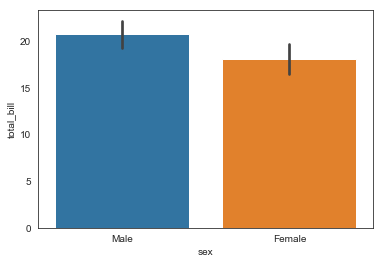

In [34]:
# Let's plot the total_bill mean for each sex

sns.barplot(x = 'sex', y = 'total_bill', data = df)

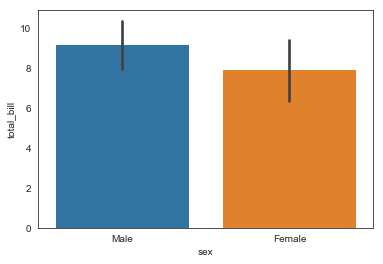

In [36]:
# We also can change to value of total_bill mean for the standard desviation of this feature
# For it, we will need to import the numpy library

import numpy as np

sns.barplot(x = 'sex',y = 'total_bill',data = df, estimator =  np.std)

## Catplot - Good and simple to see distributions!

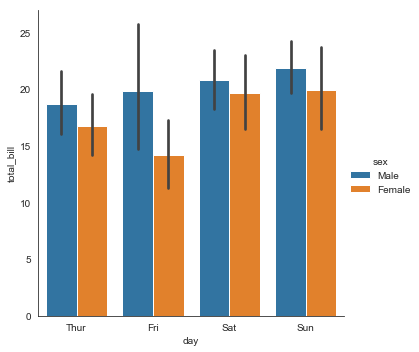

In [58]:
sns.catplot(x= 'day',y= 'total_bill', data = df, kind = 'bar', hue = 'sex')

# Kind parameter - used to choose the plot format

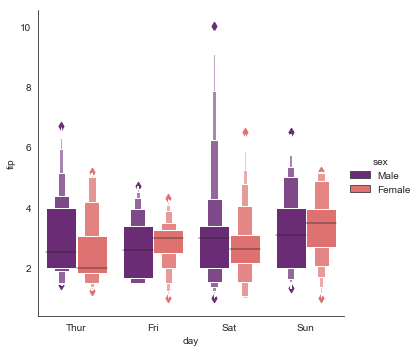

In [62]:
# Let's try another kind of plot

sns.catplot('day','tip', data = df, kind = 'boxen', palette = 'magma', hue ='sex')

## Countplot - Counting values!

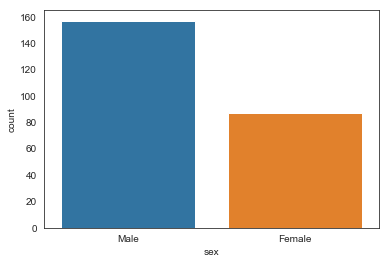

In [39]:
# Here we will just count the number of male and female data on our dataset

sns.countplot(x = 'sex', data = df)

## Boxplot - the best to analysis outliers!

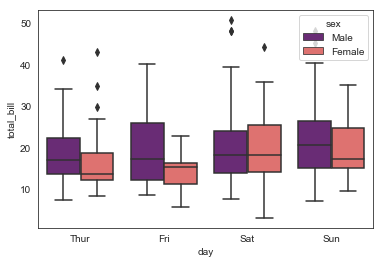

In [43]:
# Let's analyse the total bill per day with a sex segregation

sns.boxplot(x = 'day',y= 'total_bill',data = df, hue = 'sex',palette="magma")

## Stripplot - To see the distribuition points in a plot!

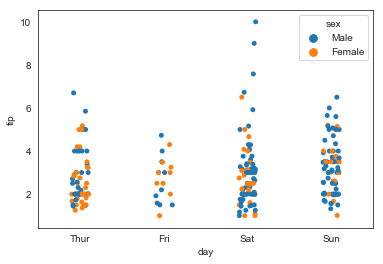

In [51]:
sns.stripplot('day', 'tip',data = df, jitter = True, hue = 'sex')

# Look, is not necessary to declare x and y, you can just pass the column in that order
# Jitter parameter is on to help the visualization for point above another, but sometimes is not enough.

**Oh, is difficult to see some points that are above others, to fix this, use the dodge parameter**

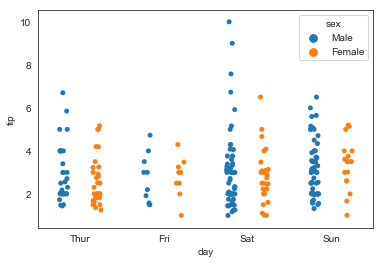

In [47]:
sns.stripplot('day', 'tip',data = df, jitter = True,  hue = 'sex', dodge = True)

## Swarmplot - is kind a stripplot, but easier to see common values

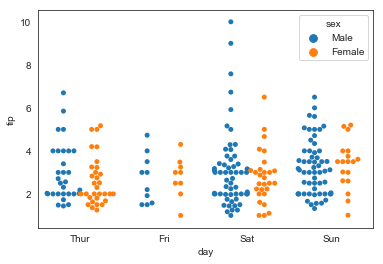

In [54]:
sns.swarmplot('day', 'tip', data = df, hue = 'sex', dodge = True)

## Heatmap - Very good to see correlations!

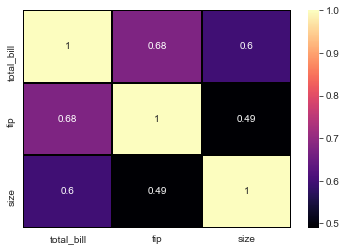

In [67]:
sns.heatmap(df.corr(), cmap = 'magma',annot = True, linecolor = 'black',lw =1)

In [68]:
# If we have more information, will be hard to see because the image is too small

# Let's import matplotlib and use this library to make bigger plots!

import matplotlib.pyplot as plt

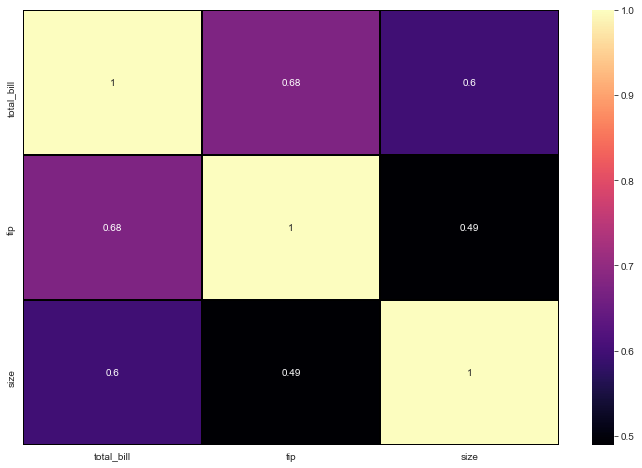

In [72]:
plt.figure(figsize=(12,8)) # figzise = (width,length)
sns.heatmap(df.corr(), cmap = 'magma',annot = True, linecolor = 'black',lw =1)

# Annot = If True, write the data value in each cell

## PivotTable and Heatmap - using two power visualization weapons!

In [78]:
# Let's create a pivot table with the data of total_bill by day segregated by sex

df.pivot_table('total_bill','day', 'sex')

sex,Male,Female
day,,
Thur,18.714667,16.715312
Fri,19.857000,14.145556
Sat,20.802542,19.680357
Sun,21.887241,19.872222


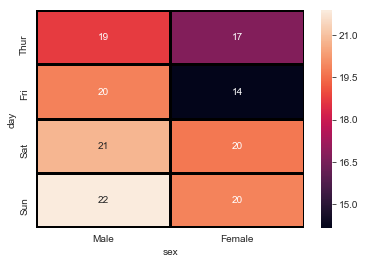

In [83]:
# We can see with a heat map the same information

sns.heatmap(df.pivot_table('total_bill','day', 'sex'), linecolor = 'black',lw=2, annot = True)

# Look, how deep is the color more cheaper was the bill
# Using this, looking only for the colors, is easy to see that the most expensive day is Sunday!

## Lmplot - Linear plot - Let's see tendences!

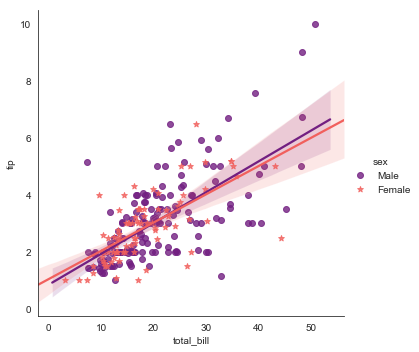

In [84]:
# Using this kind of plot, we can see if has a tendency between two variables
# It's very helpful to analyse data before to start a regression model

sns.lmplot('total_bill','tip',data = df, hue = 'sex',palette = 'magma',markers = ['o','*'])

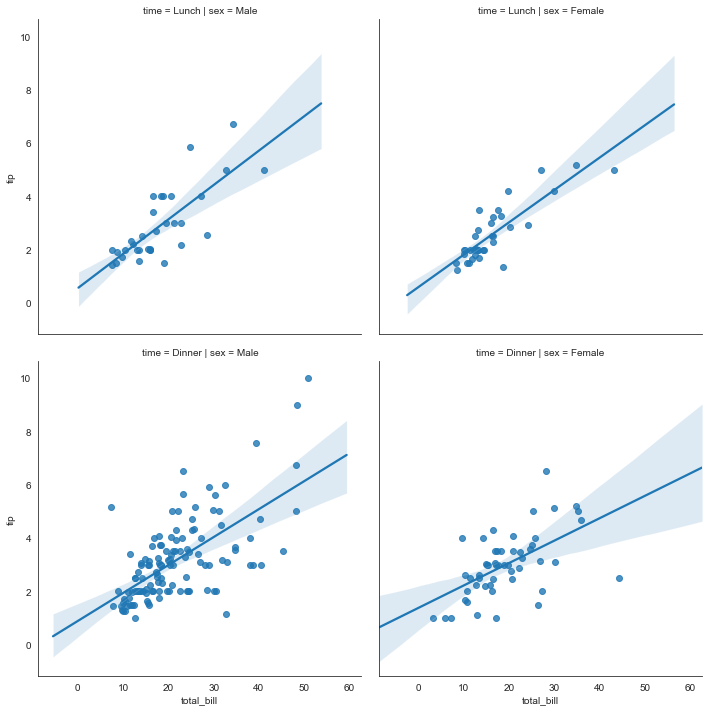

In [93]:
# We can use the col and row parameter to separete the plots 
# have a look: in the columns we got separate sex and in the rows separated by time

sns.lmplot('total_bill','tip', data = df, col = 'sex', row = 'time')

# FacetGrid - To analyse categorical data!

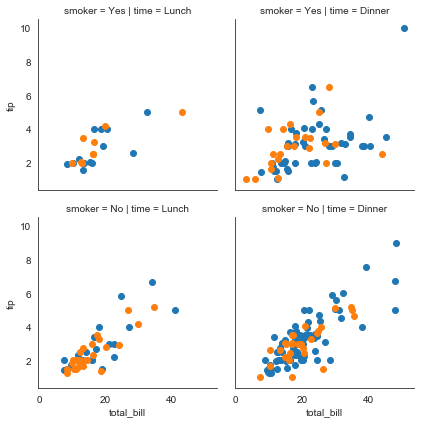

In [95]:
# Here is a little more complicated, because we need to use the map function to choose some things

# We pass for facetgrid the data, col and row, a hue (if you want) 

# After this, We use map function to apply a scatter plot (from matplotlib) to facetgrid, passing the columns to plot

sns.FacetGrid(data= df, col = 'time',row = 'smoker',hue = 'sex').map(plt.scatter, 'total_bill', 'tip')

## Setting some styles with Set_context

**With set_context We can edit some visualizations in four options:**

    Poster
    
    Paper
    
    Notebook
    
    Talk
    
**It's very helpful if you have to save the plot image**

### Set POSTER

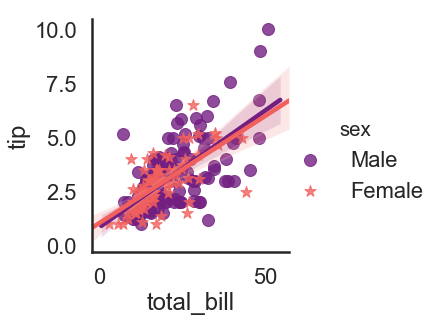

In [104]:
sns.set_context('poster')
sns.lmplot('total_bill','tip',data = df, hue = 'sex',palette = 'magma',markers = ['o','*'])

### Set PAPER

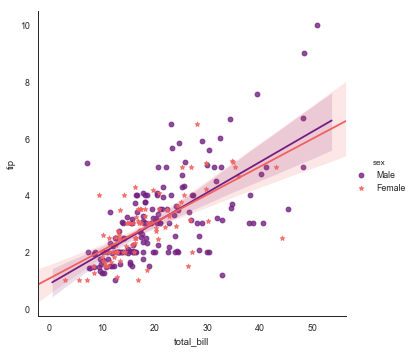

In [108]:
sns.set_context('paper')
sns.lmplot('total_bill','tip',data = df, hue = 'sex',palette = 'magma',markers = ['o','*'])

### Set NOTEBOOK

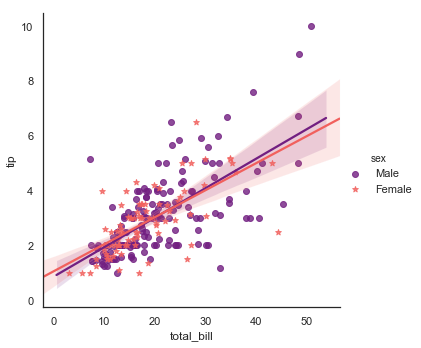

In [110]:
sns.set_context('notebook')
sns.lmplot('total_bill','tip',data = df, hue = 'sex',palette = 'magma',markers = ['o','*'])

### Set TALK

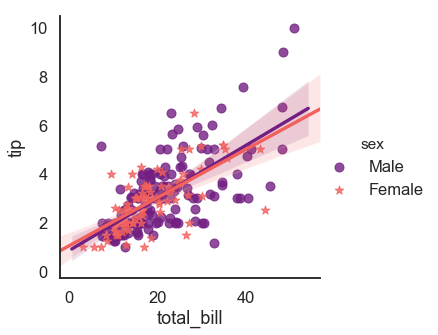

In [107]:
sns.set_context('talk')
sns.lmplot('total_bill','tip',data = df, hue = 'sex',palette = 'magma',markers = ['o','*'])